In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Saving WhatsApp Image 2024-12-04 at 20.18.51_f51f91a2.jpg to WhatsApp Image 2024-12-04 at 20.18.51_f51f91a2 (2).jpg


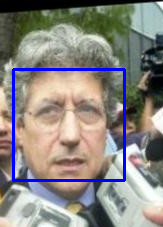

In [ ]:
from google.colab import files
uploaded = files.upload()

image_path = list(uploaded.keys())[0]
image1 = cv2.imread(image_path)
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + '/haarcascade_frontalface_default.xml')

if face_cascade.empty():
    raise IOError('Haar Cascade classifier file tidak ditemukan!')

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
# Gambar kotak di sekitar wajah yang terdeteksi
for (x, y, w, h) in faces:
    cv2.rectangle(image1, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Tampilkan gambar dengan wajah yang terdeteksi
cv2_imshow(image1)

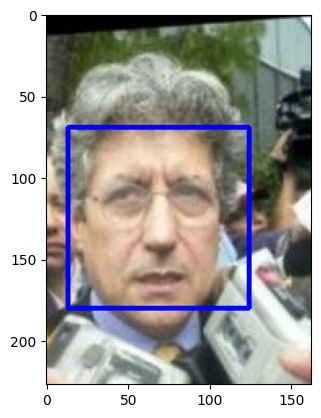

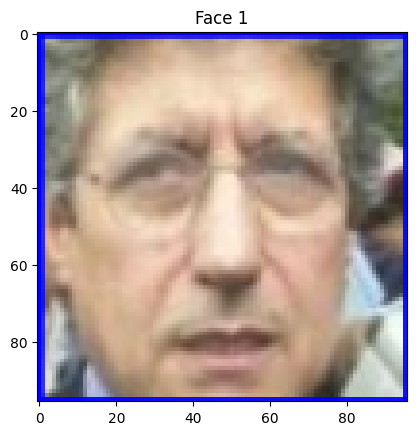

In [ ]:
cropped_faces = []
for (x, y, w, h) in faces:
    # Crop wajah
    face = image1[y:y+h, x:x+w]

    # Resize wajah ke ukuran 96x96
    resized_face = cv2.resize(face, (96, 96))
    cropped_faces.append(resized_face)

    # Gambar kotak di sekitar wajah yang terdeteksi
    cv2.rectangle(image1, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Tampilkan gambar dengan wajah yang terdeteksi
image_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)  # Konversi ke RGB
plt.imshow(image_rgb)
plt.show()

# Menampilkan wajah yang telah di-crop dan di-resize
for idx, cropped_face in enumerate(cropped_faces):
    plt.imshow(cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB))  # Konversi ke RGB
    plt.title(f"Face {idx+1}")
    plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load model
model_path = '/content/drive/MyDrive/model_full.h5'  # Ganti dengan path model Anda
model = tf.keras.models.load_model(model_path)

# Fungsi preprocessing wajah
def preprocess_face(face):
    face_gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)  # Konversi ke grayscale
    face_resized = cv2.resize(face_gray, (96, 96))  # Resize ke 96x96
    face_normalized = face_resized / 255.0  # Normalisasi piksel
    face_input = np.expand_dims(face_normalized, axis=-1)  # Tambahkan channel (1)
    face_input = np.expand_dims(face_input, axis=0)  # Tambahkan batch (1, 96, 96, 1)
    return face_input

# Proses setiap wajah yang di-crop
for idx, cropped_face in enumerate(cropped_faces):
    # Preprocess wajah
    face_input = preprocess_face(cropped_face)

    # Prediksi keypoints
    keypoints1 = model.predict(face_input)  # Output (1, N*2)
    keypoints1 = keypoints1.reshape(-1, 2)  # Ubah ke bentuk (N, 2)

    # Tampilkan array keypoints
    print(f"Face {idx+1} Keypoints Array:")
    print(keypoints1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
Face 1 Keypoints Array:
[[67.38164  36.88145 ]
 [30.99846  39.570854]
 [59.026405 37.68731 ]
 [73.091606 37.621773]
 [36.656017 38.009468]
 [22.432753 38.21821 ]
 [55.830208 29.487886]
 [79.224434 29.268951]
 [39.790215 29.697886]
 [15.645314 30.571417]
 [52.88191  67.39231 ]
 [62.82438  75.87132 ]
 [32.751667 76.1889  ]
 [47.950806 73.09048 ]
 [51.904636 81.760994]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


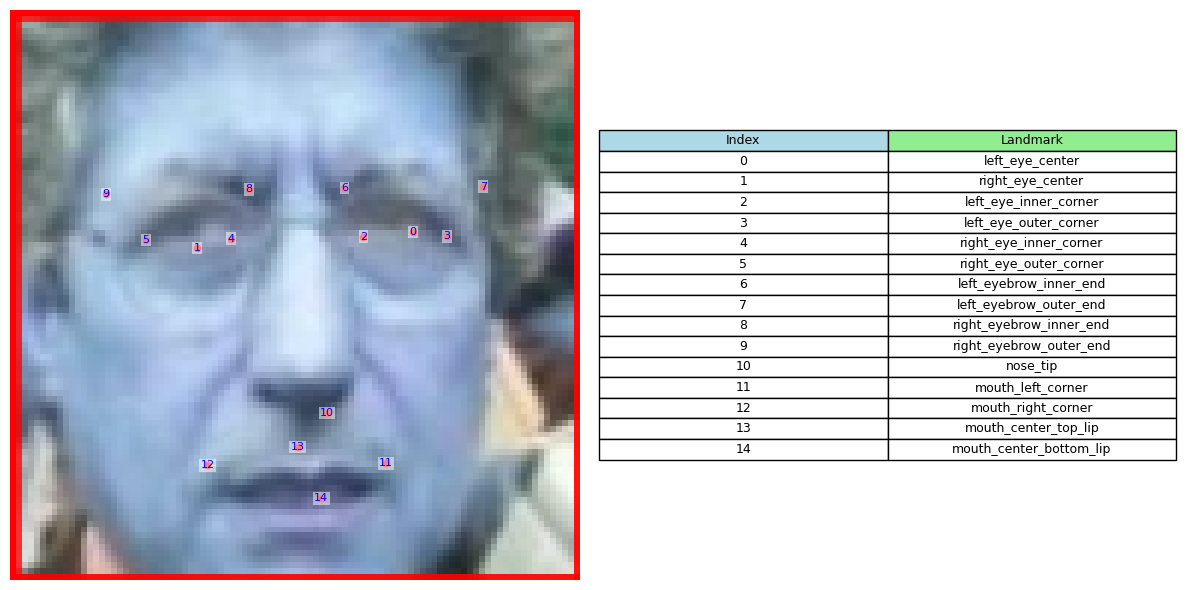

In [ ]:
def show_example(image, keypoints1, landmark_labels=None):
    """
    Menampilkan satu gambar dengan keypoints beserta indeks di setiap titik.
    Penjelasan indeks landmark akan ditampilkan di samping gambar.

    Parameters:
    - image: Gambar input dalam format grayscale (H, W) atau (H, W, 1)
    - keypoints: Array keypoints dalam format (N, 2)
    - landmark_labels: List label untuk setiap keypoint (default: None)
    """
    # Pisahkan koordinat x dan y
    x_points = keypoints1[:, 0]
    y_points = keypoints1[:, 1]

    # Buat figure dengan dua kolom: gambar di kiri dan penjelasan di kanan
    fig, (ax_img, ax_table) = plt.subplots(1, 2, figsize=(12, 6))

    # Tampilkan gambar di ax_img
    ax_img.imshow(image.squeeze(), cmap='gray')  # Tampilkan gambar
    ax_img.scatter(x_points, y_points, s=20, color='red')  # Plot keypoints

    # Tambahkan nomor indeks di setiap keypoint
    for i, (x, y) in enumerate(keypoints):
        ax_img.text(x, y, str(i), color='blue', fontsize=8, ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))

    # Hilangkan axis pada gambar
    ax_img.axis('off')

    # Menambahkan penjelasan indeks landmark di ax_table
    ax_table.axis('off')  # Sembunyikan axis untuk tabel
    ax_table.table(cellText=[[i, landmark_labels[i]] for i in range(len(landmark_labels))],
                  colLabels=['Index', 'Landmark'],
                  cellLoc='center', loc='center', colColours=['lightblue', 'lightgreen'])

    # Atur layout agar rapi
    plt.tight_layout()
    plt.show()



# Contoh data cropped face dan keypoints
cropped_face = cropped_faces[0]  # Pilih wajah pertama
face_input = preprocess_face(cropped_face)

# Prediksi keypoints
keypoints = model.predict(face_input).reshape(-1, 2)

# Daftar label landmarks sesuai dengan kolom di dataset Anda
landmark_labels = [
    "left_eye_center", "right_eye_center",
    "left_eye_inner_corner", "left_eye_outer_corner",
    "right_eye_inner_corner", "right_eye_outer_corner",
    "left_eyebrow_inner_end", "left_eyebrow_outer_end",
    "right_eyebrow_inner_end", "right_eyebrow_outer_end",
    "nose_tip",
    "mouth_left_corner", "mouth_right_corner",
    "mouth_center_top_lip", "mouth_center_bottom_lip"
]

# Pastikan jumlah label sesuai dengan jumlah keypoints
landmark_labels = landmark_labels[:len(keypoints)]

# Tampilkan gambar dan keypoints dengan angka dan penjelasan di samping
show_example(cropped_face, keypoints, landmark_labels)



Saving WhatsApp Image 2024-12-04 at 20.19.02_25338d6b.jpg to WhatsApp Image 2024-12-04 at 20.19.02_25338d6b.jpg


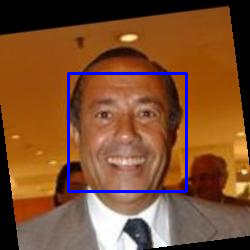

In [ ]:
from google.colab import files
uploaded = files.upload()

image_path = list(uploaded.keys())[0]
image2 = cv2.imread(image_path)
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + '/haarcascade_frontalface_default.xml')

if face_cascade.empty():
    raise IOError('Haar Cascade classifier file tidak ditemukan!')

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
# Gambar kotak di sekitar wajah yang terdeteksi
for (x, y, w, h) in faces:
    cv2.rectangle(image2, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Tampilkan gambar dengan wajah yang terdeteksi
cv2_imshow(image2)

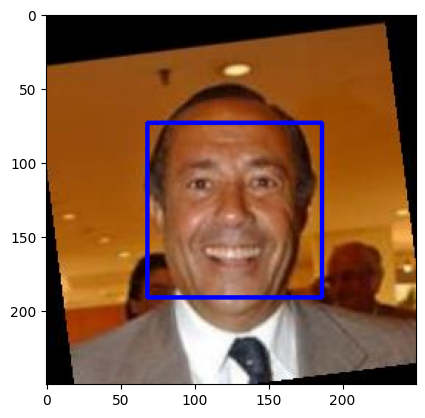

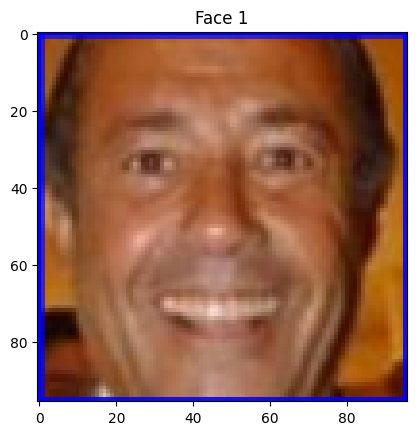

In [ ]:
cropped_faces = []
for (x, y, w, h) in faces:
    # Crop wajah
    face = image2[y:y+h, x:x+w]

    # Resize wajah ke ukuran 96x96
    resized_face = cv2.resize(face, (96, 96))
    cropped_faces.append(resized_face)

    # Gambar kotak di sekitar wajah yang terdeteksi
    cv2.rectangle(image2, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Tampilkan gambar dengan wajah yang terdeteksi
image_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)  # Konversi ke RGB
plt.imshow(image_rgb)
plt.show()

# Menampilkan wajah yang telah di-crop dan di-resize
for idx, cropped_face in enumerate(cropped_faces):
    plt.imshow(cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB))  # Konversi ke RGB
    plt.title(f"Face {idx+1}")
    plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load model
model_path = '/content/drive/MyDrive/model_full.h5'  # Ganti dengan path model Anda
model = tf.keras.models.load_model(model_path)

# Fungsi preprocessing wajah
def preprocess_face(face):
    face_gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)  # Konversi ke grayscale
    face_resized = cv2.resize(face_gray, (96, 96))  # Resize ke 96x96
    face_normalized = face_resized / 255.0  # Normalisasi piksel
    face_input = np.expand_dims(face_normalized, axis=-1)  # Tambahkan channel (1)
    face_input = np.expand_dims(face_input, axis=0)  # Tambahkan batch (1, 96, 96, 1)
    return face_input

# Proses setiap wajah yang di-crop
for idx, cropped_face in enumerate(cropped_faces):
    # Preprocess wajah
    face_input = preprocess_face(cropped_face)

    # Prediksi keypoints
    keypoints2 = model.predict(face_input)  # Output (1, N*2)
    keypoints2 = keypoints2.reshape(-1, 2)  # Ubah ke bentuk (N, 2)

    # Tampilkan array keypoints
    print(f"Face {idx+1} Keypoints Array:")
    print(keypoints2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
Face 1 Keypoints Array:
[[64.44307  35.926075]
 [30.773424 35.903954]
 [58.205666 37.975727]
 [72.23714  37.524536]
 [36.82393  38.003674]
 [22.56188  38.02364 ]
 [55.300938 29.302158]
 [78.56711  29.770313]
 [39.044014 29.720592]
 [15.666593 30.664083]
 [49.846283 59.770565]
 [62.792316 75.049866]
 [32.478786 75.601265]
 [47.79111  72.567154]
 [49.633194 71.75727 ]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


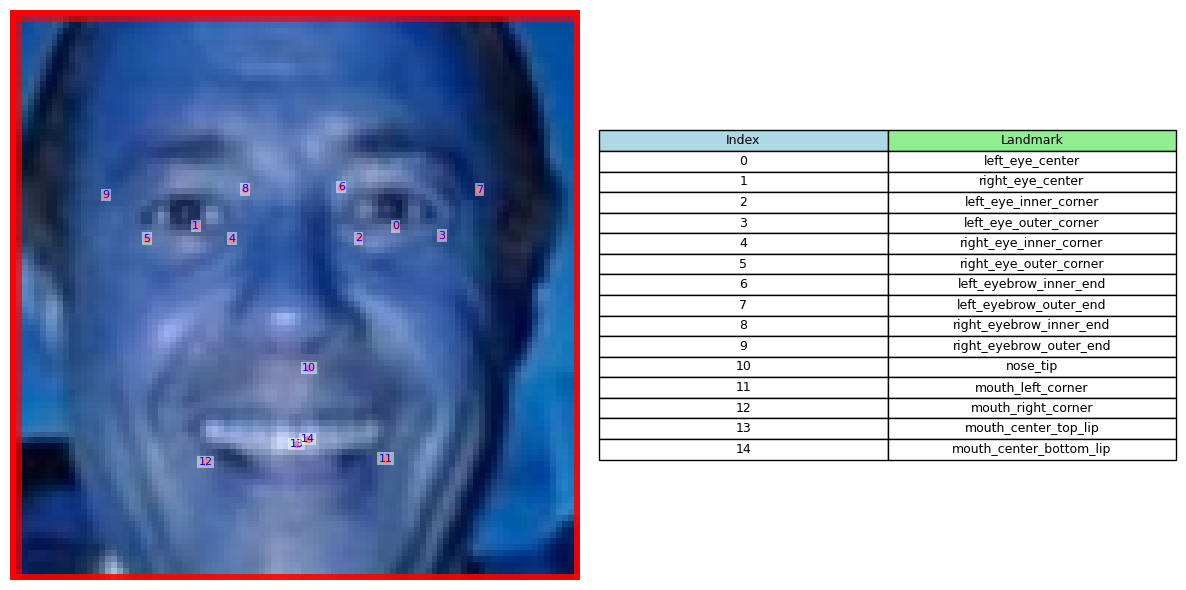

In [ ]:
def show_example(image, keypoints2, landmark_labels=None):
    """
    Menampilkan satu gambar dengan keypoints beserta indeks di setiap titik.
    Penjelasan indeks landmark akan ditampilkan di samping gambar.

    Parameters:
    - image: Gambar input dalam format grayscale (H, W) atau (H, W, 1)
    - keypoints: Array keypoints dalam format (N, 2)
    - landmark_labels: List label untuk setiap keypoint (default: None)
    """
    # Pisahkan koordinat x dan y
    x_points = keypoints2[:, 0]
    y_points = keypoints2[:, 1]

    # Buat figure dengan dua kolom: gambar di kiri dan penjelasan di kanan
    fig, (ax_img, ax_table) = plt.subplots(1, 2, figsize=(12, 6))

    # Tampilkan gambar di ax_img
    ax_img.imshow(image.squeeze(), cmap='gray')  # Tampilkan gambar
    ax_img.scatter(x_points, y_points, s=20, color='red')  # Plot keypoints

    # Tambahkan nomor indeks di setiap keypoint
    for i, (x, y) in enumerate(keypoints):
        ax_img.text(x, y, str(i), color='blue', fontsize=8, ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))

    # Hilangkan axis pada gambar
    ax_img.axis('off')

    # Menambahkan penjelasan indeks landmark di ax_table
    ax_table.axis('off')  # Sembunyikan axis untuk tabel
    ax_table.table(cellText=[[i, landmark_labels[i]] for i in range(len(landmark_labels))],
                  colLabels=['Index', 'Landmark'],
                  cellLoc='center', loc='center', colColours=['lightblue', 'lightgreen'])

    # Atur layout agar rapi
    plt.tight_layout()
    plt.show()



# Contoh data cropped face dan keypoints
cropped_face = cropped_faces[0]  # Pilih wajah pertama
face_input = preprocess_face(cropped_face)

# Prediksi keypoints
keypoints = model.predict(face_input).reshape(-1, 2)

# Daftar label landmarks sesuai dengan kolom di dataset Anda
landmark_labels = [
    "left_eye_center", "right_eye_center",
    "left_eye_inner_corner", "left_eye_outer_corner",
    "right_eye_inner_corner", "right_eye_outer_corner",
    "left_eyebrow_inner_end", "left_eyebrow_outer_end",
    "right_eyebrow_inner_end", "right_eyebrow_outer_end",
    "nose_tip",
    "mouth_left_corner", "mouth_right_corner",
    "mouth_center_top_lip", "mouth_center_bottom_lip"
]

# Pastikan jumlah label sesuai dengan jumlah keypoints
landmark_labels = landmark_labels[:len(keypoints)]

# Tampilkan gambar dan keypoints dengan angka dan penjelasan di samping
show_example(cropped_face, keypoints, landmark_labels)



In [ ]:
def normalize_landmarks(keypoints, img_width, img_height):
    normalized = keypoints / [img_width, img_height]
    return normalized

In [ ]:
def calculate_distances(landmarks):
    num_points = len(landmarks)
    distances = []
    for i in range(num_points):
        for j in range(i + 1, num_points):
            dist = np.linalg.norm(landmarks[i] - landmarks[j])
            distances.append(dist)
    return np.array(distances)

In [ ]:
def verify_face(features1, features2, threshold=0.5):
    # Menggunakan jarak Euclidean
    distance = np.linalg.norm(features1 - features2)
    return distance < threshold  # True jika wajah cocok


In [ ]:
keypoints1

array([[67.38164 , 36.88145 ],
       [30.99846 , 39.570854],
       [59.026405, 37.68731 ],
       [73.091606, 37.621773],
       [36.656017, 38.009468],
       [22.432753, 38.21821 ],
       [55.830208, 29.487886],
       [79.224434, 29.268951],
       [39.790215, 29.697886],
       [15.645314, 30.571417],
       [52.88191 , 67.39231 ],
       [62.82438 , 75.87132 ],
       [32.751667, 76.1889  ],
       [47.950806, 73.09048 ],
       [51.904636, 81.760994]], dtype=float32)

In [ ]:
keypoints2

array([[64.44307 , 35.926075],
       [30.773424, 35.903954],
       [58.205666, 37.975727],
       [72.23714 , 37.524536],
       [36.82393 , 38.003674],
       [22.56188 , 38.02364 ],
       [55.300938, 29.302158],
       [78.56711 , 29.770313],
       [39.044014, 29.720592],
       [15.666593, 30.664083],
       [49.846283, 59.770565],
       [62.792316, 75.049866],
       [32.478786, 75.601265],
       [47.79111 , 72.567154],
       [49.633194, 71.75727 ]], dtype=float32)

In [ ]:
import numpy as np
# Normalisasi
img_width, img_height = 96, 96  # Sesuaikan dengan ukuran gambar
landmarks1_normalized = normalize_landmarks(keypoints1, img_width, img_height)
landmarks2_normalized = normalize_landmarks(keypoints2, img_width, img_height)

# Ekstraksi fitur
features1 = calculate_distances(landmarks1_normalized)
features2 = calculate_distances(landmarks2_normalized)

# Verifikasi wajah
is_same = verify_face(features1, features2, threshold=0.1981)
print(f"Faces match: {is_same}")


Faces match: False


In [ ]:
features1 = calculate_distances(landmarks1_normalized)
features2 = calculate_distances(landmarks2_normalized)

features1
features2

array([0.35072555, 0.06839101, 0.08287803, 0.28851221, 0.4368092 ,
       0.1175999 , 0.16049169, 0.2723555 , 0.51103632, 0.29122472,
       0.40790209, 0.53072238, 0.41924416, 0.40386681, 0.28656629,
       0.43224344, 0.06671339, 0.08834078, 0.26458797, 0.50193395,
       0.10756771, 0.16656006, 0.31824393, 0.52680039, 0.41389505,
       0.42104367, 0.42199089, 0.1462367 , 0.22272661, 0.37128977,
       0.09528161, 0.22867304, 0.21733574, 0.44961317, 0.24315594,
       0.38913314, 0.47479361, 0.37630412, 0.36304437, 0.36892135,
       0.51747671, 0.19611082, 0.10426896, 0.35518923, 0.59359394,
       0.32878342, 0.40307991, 0.57344329, 0.44507252, 0.42731426,
       0.14856315, 0.21274399, 0.44320208, 0.08932752, 0.23327344,
       0.26421794, 0.4712638 , 0.39424835, 0.37772638, 0.37606657,
       0.35292523, 0.5896885 , 0.19224362, 0.10505251, 0.36344576,
       0.56953828, 0.404835  , 0.44558118, 0.45055111, 0.242405  ,
       0.16939904, 0.41310143, 0.32242521, 0.48288565, 0.53769

In [ ]:
distance = np.linalg.norm(features1 - features2)
distance

0.4075359271779539